<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Neural Networks with One Hidden Layer</font></h1> 


# Table of Contents
In this lab, you will use a single layer neural network to classify handwritten digits from the MNIST database.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper Functions</a></li>
<li><a href="#ref1">Neural Network Module and Training Function</a></li>
<li><a href="#ref2">Prepare Data</a></li>
<li><a href="#ref3">Define the Neural Network, Criterion Function, Optimizer, and Train the  Model</a></li>
<li><a href="#ref4">Analyze Results</a></li>
<li><a href="#ref4">Practice Question</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

Import the following libraries:  

In [1]:
!conda install -y torchvision
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Solving environment: done

# All requested packages already installed.



<a id="ref0"></a>
<h2 align=center>Helper Functions</h2>

Use the following helper functions for plotting the loss: 

In [2]:
def plot_accuracy_loss(training_results): 
   
    plt.subplot(2, 1, 1)

    plt.plot(training_results['training_loss'],'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    
    plt.subplot(2,1,2)
    plt.plot( training_results['validation_accuracy'])

    plt.ylabel('accuracy')
    plt.xlabel('epochs ')   
    plt.show()


Use the following function for printing the model parameters: 

In [3]:
def pint_model_parameters(model):
    for i in range(len(list(model.parameters()))):
        if (i+1)%2==0:
            print("the number of bias parameters for layer",i)
        else:
            print("the number of parameters for layer",i+1)
    
        print( list(model.parameters())[i].size() )

Define the neural network module or class: 

In [4]:
def show_data(data_sample):

    plt.imshow(data_sample.numpy().reshape(28,28),cmap='gray')
    plt.show()
   

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

Define the neural network module or class: 

In [5]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 

In [6]:
def train(model,criterion, train_loader,validation_loader, optimizer, epochs=100):
    i=0
    useful_stuff={'training_loss':[],'validation_accuracy':[]}  
    
    #n_epochs
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):

            #clear gradient 
            optimizer.zero_grad()
            #make a prediction logits 
            z=model(x.view(-1,28*28))
            # calculate loss 
            loss=criterion(z,y)
    
            # calculate gradients of parameters 
            loss.backward()
            # update parameters 
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct=0
        for x, y in validation_loader:
            #perform a prediction on the validation  data  
            yhat=model(x.view(-1,28*28))
            
            _,lable=torch.max(yhat,1)
            correct+=(lable==y).sum().item()
 
    
        accuracy=100*(correct/len(validation_dataset))
   
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [8]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [9]:
criterion=nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 

In [10]:


train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)


<a id="ref3"></a>
<h2 align=center>Define the Neural Network, Criterion Function, Optimizer, and Train the Model  </h2> 

Create the criterion function: 

In [11]:
criterion=nn.CrossEntropyLoss()

Create the model with 100 hidden layers: 

In [12]:
input_dim=28*28
hidden_dim=100
output_dim=10

model=Net(input_dim,hidden_dim,output_dim)

Print the model parameters: 

In [13]:
pint_model_parameters(model)

the number of parameters for layer 1
torch.Size([100, 784])
the number of bias parameters for layer 1
torch.Size([100])
the number of parameters for layer 3
torch.Size([10, 100])
the number of bias parameters for layer 3
torch.Size([10])


Define the optimizer object with a learning rate of 0.01: 

In [14]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

Train the model by using 100 epochs **(this process takes time)**: 

In [15]:
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=30)

<a id="ref3"></a>
<h2 align=center>Analyze Results</h2> 

Plot the training total loss or cost for every iteration and plot the training accuracy for every epoch:  

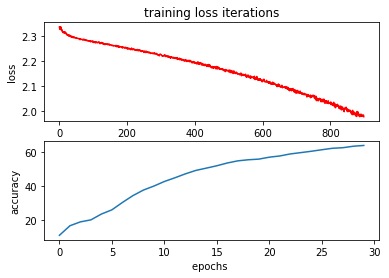

In [16]:
plot_accuracy_loss(training_results)

Plot the first five misclassified samples:   

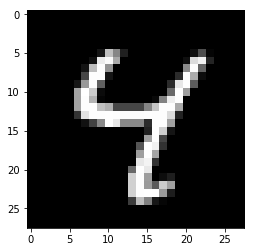

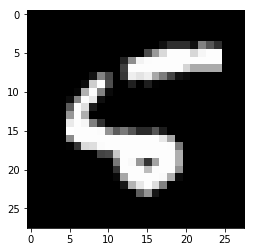

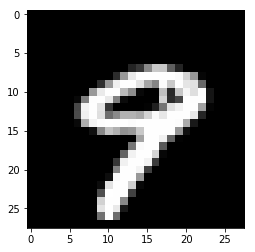

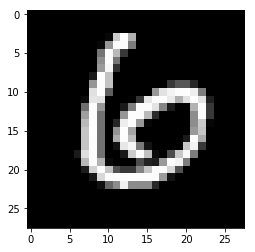

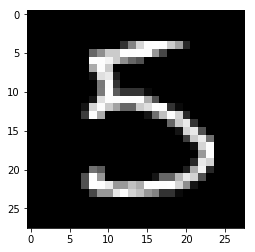

In [17]:
count=0
for x,y in validation_dataset:

    z=model(x.reshape(-1,28*28))
    _,yhat=torch.max(z,1)
    if yhat!=y:
        show_data(x)
        count+=1
    if count>=5:
        break 
        

<a id="ref3"></a>
<h2 align=center>Practice Question </h2> 

Use <code>nn.Sequential</code> to build exactly the same model as you just built. Use the function <train>train</train> to train the model and use the function <code>plot_accuracy_loss</code> to see the metrics. Also, try different epoch numbers. 

Double-click __here__ for the solution.

<!-- 
input_dim=28*28
hidden_dim=100
output_dim=10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=10)
plot_accuracy_loss(training_results)

-->

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) ,[Mavis Zhou ]( www.linkedin.com/in/jiahui-mavis-zhou-a4537814a)
      <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).